<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/EDA_emissions_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: 
by Hannah Bohle

digging deeper into the scatterplot of 'E_IDLE_CO2' and 'E_HIGH_CO2', removing outlier, to be able to see their true distribution. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/WIMLDS/'

In [ ]:
cars2 = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')
filter_col = [col for col in cars2 if col.startswith('E_') | col.startswith('OVERALL_RESULT') ]
E_cars = cars2[filter_col]
E_cars.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,OVERALL_RESULT,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT
0,1,1,1.21,2676,12.7,3.57,18,22,180,0.0,0.0,1.2,1.23,809.0,12.4,3.8,26.0,32.0,180.0,0.03,0.04,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P
1,1,1,0.00,0,0.0,0.00,0,0,100,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,P,N,N,N,N
2,1,1,1.47,2480,10.4,6.73,20,29,200,0.0,0.0,1.2,0.00,690.0,0.0,0.0,0.0,0.0,200.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F,A,P,P,P,P
3,1,1,1.13,2495,13.6,2.32,12,14,300,0.0,0.0,3.0,1.24,911.0,12.4,4.1,12.0,15.0,300.0,0.00,0.00,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P,P,P,P,P,P
4,1,1,0.00,0,0.0,0.00,0,0,100,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,P,N,N,N,N


In [ ]:
E_cars.shape

(235177, 44)

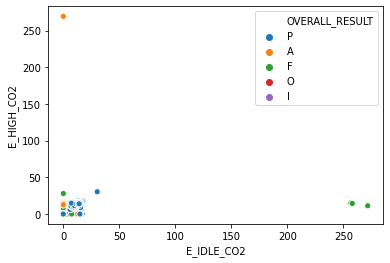

In [ ]:
#scatterplot BEFORE outlier correction
sns.scatterplot(data=cars2, x='E_IDLE_CO2', y='E_HIGH_CO2', hue='OVERALL_RESULT', alpha=1)

In [ ]:
#first variable: High_Co2
E_cars["E_HIGH_CO2"].describe()

count    235177.000000
mean          2.858425
std           5.687424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         269.620000
Name: E_HIGH_CO2, dtype: float64

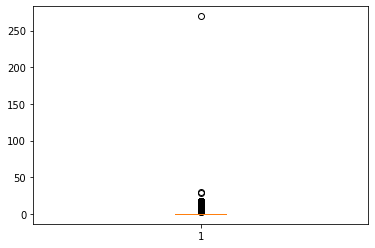

In [ ]:
#has one outlier
plt.boxplot(E_cars["E_HIGH_CO2"])
plt.show()

In [ ]:
#remove the outlier for "e_high_co2"
index = E_cars[(E_cars["E_HIGH_CO2"] > 100)].index
E_cars.drop(index, inplace=True)
E_cars["E_HIGH_CO2"].describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    235176.000000
mean          2.857290
std           5.660772
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.340000
Name: E_HIGH_CO2, dtype: float64

In [ ]:
E_cars["E_IDLE_CO2"].describe()

count    235175.000000
mean          2.748527
std           5.604533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         271.620000
Name: E_IDLE_CO2, dtype: float64

In [ ]:
#remove the outlier for "e_high_co2"
index = E_cars[(E_cars["E_IDLE_CO2"] > 100)].index
E_cars.drop(index, inplace=True)
E_cars["E_IDLE_CO2"].describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    235172.000000
mean          2.745219
std           5.527460
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.240000
Name: E_IDLE_CO2, dtype: float64

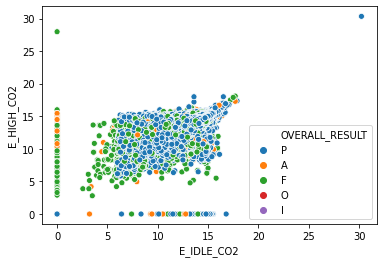

In [ ]:
#scatterplot BEFORE outlier correction
sns.scatterplot(data=E_cars, x='E_IDLE_CO2', y='E_HIGH_CO2', hue='OVERALL_RESULT', alpha=1)

In [ ]:
sns.distplot(E_cars, name='E_IDLE_CO2', alpha=1)

TypeError: ignored

Complete outlier correction attempt

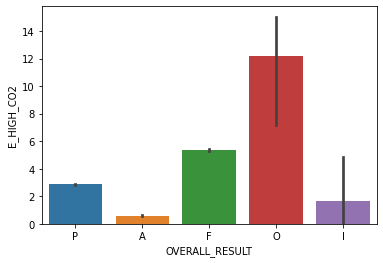

In [ ]:
#scatterplot after outlier correction
#fig, axs = plt.subplots(1, 2, figsize=(15, 10))
#sns.barplot(data=E_cars, x='OVERALL_RESULT', y='E_IDLE_CO2', alpha=1)
sns.barplot(data=E_cars, x='OVERALL_RESULT', y='E_HIGH_CO2', alpha=1)


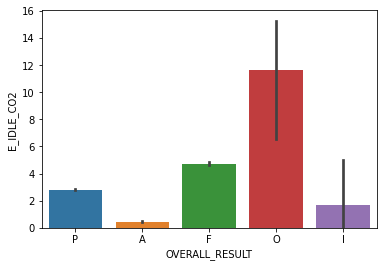

In [ ]:
#scatterplot after outlier correction
#fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.barplot(data=E_cars, x='OVERALL_RESULT', y='E_IDLE_CO2', alpha=1)
#sns.barplot(data=E_cars, x='E_HIGH_CO2', y='OVERALL_RESULT', alpha=1)

In [ ]:
#new df with only numerical E-data (without results-columns containing str)
E_cars2 = E_cars.iloc[:, 2:-5]
E_cars2 = cars2["OVERALL_RESULT"]
E_cars2.head()

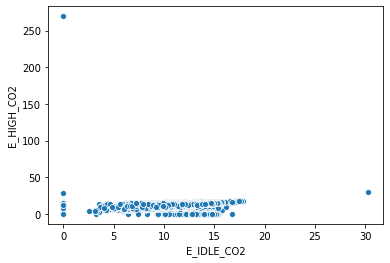

In [ ]:
#scatterplot AFTER outlier correction
sns.scatterplot(data=E_cars2, x='E_IDLE_CO2', y='E_HIGH_CO2', alpha=1)

In [ ]:
#@title
from scipy import stats
import numpy as np


In [ ]:
#@title
z = np.abs(stats.zscore(E_cars2["E_HIGH_CO2"]))
print(z)

[1.73041376 0.50258793 1.32601188 ... 0.50258793 1.94140604 0.50258793]


In [ ]:
#@title
Q1 = E_cars2["E_HIGH_CO2"].quantile(0.10)
Q3 = E_cars2["E_HIGH_CO2"].quantile(0.90)
IQR = Q3 - Q1
print(IQR)

14.599999999999998


In [ ]:
from scipy import stats
cars2[(np.abs(stats.zscore(cars2)) < 3).all(axis=1)]